# K means clustering

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("housing.csv")
data = data.dropna()
data = data[data['ocean_proximity'] != 'ISLAND']

oec = OneHotEncoder()
ocean_proximity_encoded = oec.fit_transform(data[['ocean_proximity']]).toarray()

columns = oec.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=columns)

ocean_proximity_df.index = data.index

normalizedData = pd.DataFrame()
scaler = MinMaxScaler()
for i in range(data.shape[1]-1):
    normalData = scaler.fit_transform(data.iloc[:, i].values.reshape(-1, 1))
    normalizedData[data.columns[i]] = pd.Series(np.ravel(normalData))
normalizedData.index = data.index

data = pd.concat([normalizedData, ocean_proximity_df], axis=1)
data, median_house_value = data.drop(["median_house_value"], axis=1), data[["median_house_value"]]
display(data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0


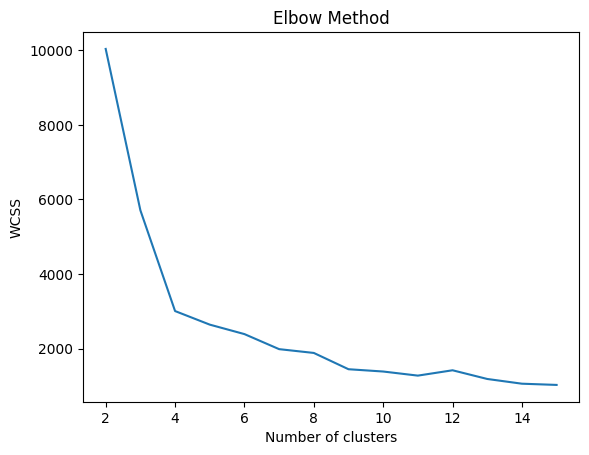

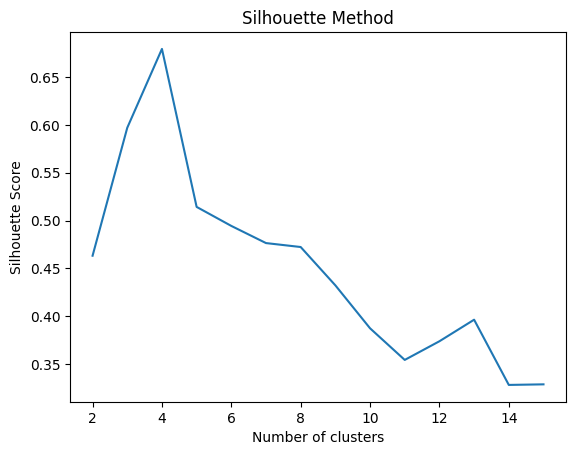

In [18]:
wcss = []
silhouette_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans_result = kmeans.fit(np.asarray(data))
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    
plt.plot(range(2, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.plot(range(2, 16), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

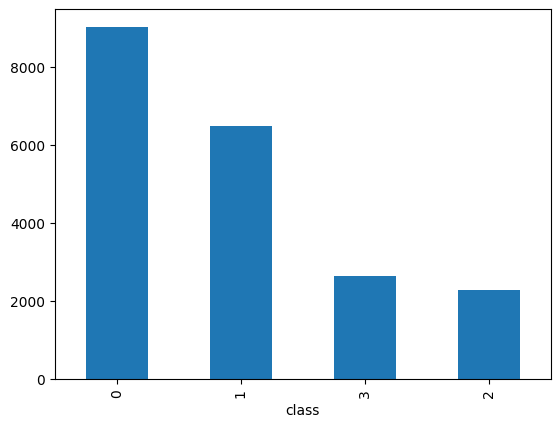

In [19]:
k = 4
kmeans = KMeans(n_clusters=k, n_init="auto")
kmeans_result = kmeans.fit(np.asarray(data))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()

_ = kmeans_distribution.plot(kind='bar')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,Label
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,1.0,0.0,0.902266,2
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,1.0,0.0,0.708247,2
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,1.0,0.0,0.695051,2
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,1.0,0.0,0.672783,2
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,1.0,0.0,0.674638,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.130105,1
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.128043,1
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.159383,1
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.143713,1


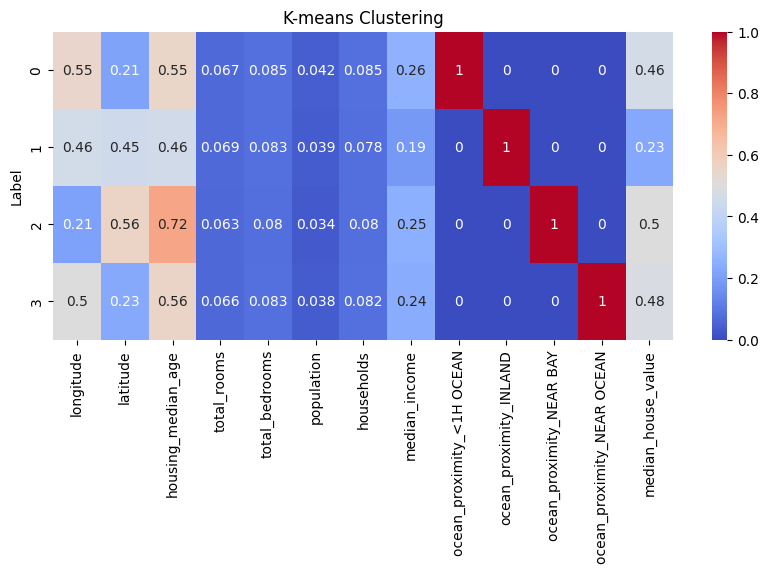

In [22]:
kmeans_clustering.index = data.index
data["median_house_value"] = median_house_value
data["Label"] = kmeans_clustering
display(data)
data_grouped = data.groupby("Label").mean()


plt.figure(figsize=(10, 4))
sns.heatmap(data_grouped, cmap='coolwarm', annot=True)
plt.title('K-means Clustering')
plt.show()